<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-diegolarte/blob/main/Curso%20IBM%202/Modulo%204/Modulo4_Notes_IBM_Data_Analysis_A01794028.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Module 4 - Model Development

###Desarrollo del modelo

Un modelo puede ser visto como una ecuacion matematica usada para predecir un valor en base a uno o mas valores dados, relacionando una o mas variables independientes a variables dependientes
1. Regresión lineal simple y multiple
2. Evaluacion del modelo usando visualizacion
3. Regresion polinomial y pipelines
4. R-squared y MMSE para Evaluacion
5. Prediccion y toma de desiciones

Pregunta de negocio:

¿ Como se puede de terminar el valor justo de un carro usado?

### Regresión lineal

* Regresion lineal simple: Hace referencia a una variable independiente para hacer una predicción
* Regresion lineal multiple: Hace referencia a multiples variables independientes para hacer una predicción


Entrenar un modelo estimador de regresion lineal simple

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [ ]:
#Crear un objeto estimador de regresion lineal
lm = LinearRegression()

In [ ]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

In [ ]:
df = pd.read_csv(filename)

Definir la variable predictor(X) y la variable objetivo(Y)

In [ ]:
X = df[["highway-mpg"]]
Y = df['price']

Entrenar el modelo lm con X y Y

In [ ]:
lm.fit(X , Y)

LinearRegression()

Obtener una prediccion

In [ ]:
yhat = lm.predict(X)

In [ ]:
#La salida es un arreglo con la prediccion de la variable Y
yhat

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508, 17879.97140011, 17879.97140011, 17879.97140011,
       21988.63829172, 14593.03788682, 14593.03788682, 15414.77126514,
       15414.77126514, 17879.97140011, 20345.17153508, 20345.17153508,
       21988.63829172, -5128.5631929 ,  3088.77059031,  3088.77059031,
        4732.23734696,  7197.43748192, 13771.3045085 ,  7197.43748192,
        7197.43748192,  7197.43748192, 13771.3045085 , 13771.3045085 ,
       18701.70477843, -5950.29657123,  7197.43748192,  3910.50396864,
       10484.37099521, 10484.37099521, 10484.37099521, 10484.37099521,
       11306.10437353, 11306.10437353, 11306.10437353, 11306.10437353,
       15414.77126514, 12949.57113018, 14593.03788682, 14593.03788682,
       22810.37167004, 22810.37167004, 24453.83842668, 12949.57113018,
        7197.43748192,  7197.43748192,  7197.43748192,  7197.43748192,
       19523.43815675, 19523.43815675, 19523.43815675, 19523.43815675,
      

Visualizar la intersección y la pendiente

In [ ]:
print(lm.intercept_)
print(lm.coef_)


38423.3058581574
[-821.73337832]


#La relacion entre Price y Highway MPG esta dada por la siguiente ecuacion

Price = 38423.31 - 821.73 * highway-mpg

Entrenar un modelo estimador de regresion lineal Multiple:

* Una variable objetivo (Y) continua 
* Dos o mas predictores (X)

Extraer las 4 variables predictoras y almacenarlas en una variable Z

In [ ]:
Z = df[["horsepower","curb-weight","engine-size","highway-mpg"]]

Entrenar el modelo con Z y Y

In [ ]:
lm.fit(Z, df['price'])

LinearRegression()

Obtener la prediccion

In [ ]:
yhat = lm.predict(Z)

Encontrar la intersección y la pendiente

In [ ]:
print(lm.intercept_)
print(lm.coef_)

-15806.62462632923
[53.49574423  4.70770099 81.53026382 36.05748882]


#La relacion entre Price y las 4 variables predictoras esta dada por la siguiente ecuacion

Price = -15806.62 + (53.49) * horsepower + (4.70) * curb-weight + (81.53) * engine-size + (36.05) * highway-mpg

### Evaluación del modelo usando visualización

Gráfico de regresión:
Nos da una buena estimación de:
* La relación entre dos variables
* La fortaleza en la correlacion
* La dirección de la relacion (Positiva o Negativa) 

Regression Plot

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

(0.0, 48185.214487412886)

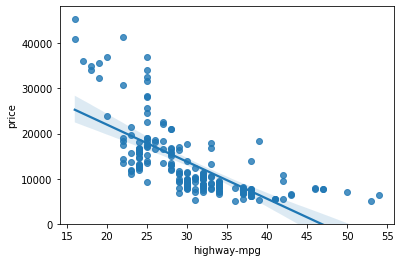

In [ ]:
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

Residual Plot:

Representa el error entre los valores reales, examinando la diferencia entre los valores predecidos y los reales

* Se esperan ver resultados con media cero

c:\Users\Diego Olarte\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

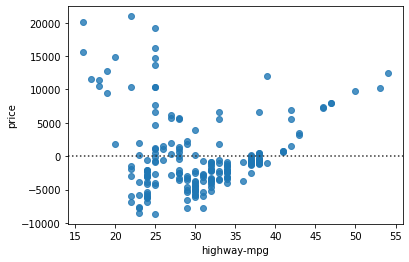

In [ ]:
sns.residplot(df["highway-mpg"], df["price"])

Distribution Plot:
* Estos gráficos son muy utiles para visualizar modelos con mas de una variable independiente


c:\Users\Diego Olarte\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\Diego Olarte\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

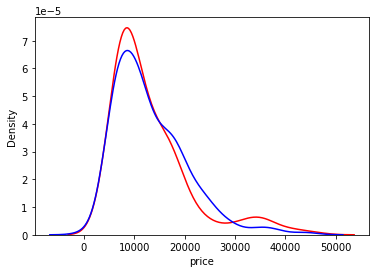

In [ ]:
ax1 = sns.distplot(df["price"], hist=False, color="r", label="Actual Value")
sns.distplot(yhat, hist=False, color="b", label="Fitted Values", ax=ax1)

### Regresión Polinómica y Pipelines

* Es un caso especial del modelo de regresion lineal general
* Es util para describir relaciones curvilineas

In [ ]:
import numpy as np

In [ ]:
#Calcular polinomio de 3er orden
f= np.polyfit(df["highway-mpg"], df["price"],3)
p = np.poly1d(f)

In [ ]:
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


Regresion Polinomica con mas de una dimension

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2, include_bias=False)

In [ ]:
x_polly= pr.fit_transform(df[["horsepower","curb-weight"]])
x_polly

array([[1.1100000e+02, 2.5480000e+03, 1.2321000e+04, 2.8282800e+05,
        6.4923040e+06],
       [1.1100000e+02, 2.5480000e+03, 1.2321000e+04, 2.8282800e+05,
        6.4923040e+06],
       [1.5400000e+02, 2.8230000e+03, 2.3716000e+04, 4.3474200e+05,
        7.9693290e+06],
       ...,
       [1.3400000e+02, 3.0120000e+03, 1.7956000e+04, 4.0360800e+05,
        9.0721440e+06],
       [1.0600000e+02, 3.2170000e+03, 1.1236000e+04, 3.4100200e+05,
        1.0349089e+07],
       [1.1400000e+02, 3.0620000e+03, 1.2996000e+04, 3.4906800e+05,
        9.3758440e+06]])

Pre-procesamiento

In [ ]:
from sklearn.preprocessing import StandardScaler

SCALE = StandardScaler()
SCALE.fit(df[["horsepower","highway-mpg"]])

x_scale = SCALE.transform(df[["horsepower","highway-mpg"]])

Pipelines

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(degree=2)), ('model',LinearRegression())]

In [ ]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [ ]:
Z = Z.astype(float)

In [ ]:
pipe.fit(Z,Y)
yhat = pipe.predict(Z)

In [ ]:
yhat[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

### Predicción y toma de decision

Para determinar el mejor modelo, se debe revisar la combinacion de los siguientes items:
* Los valores predecidos tienen sentido
* Visualizacion
* Metricas para evaluacion
* Comparando modelos

In [ ]:
#entrenar el modelo
X = df[["highway-mpg"]]
lm.fit(X,df["price"])

LinearRegression()

In [ ]:
#predecir el precio de un carro con 30 highway-mpg
lm.predict(np.array(30).reshape(-1, 1))

c:\Users\Diego Olarte\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13771.3045085])

In [ ]:
lm.coef_

array([-821.73337832])

La pendiente indica que por cada unidad que se incrementa a highway-mpg el valor del carro decae en 821 dolares, lo cual tiene sentido

In [ ]:
#Generar una secuencia desde 1 hasta 100
new_input = np.arange(1,101,1).reshape(-1,1)
new_input

array([[  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
       [ 71],
      

In [ ]:
#Predecir nuevos valores
yhat = lm.predict(new_input)
yhat

c:\Users\Diego Olarte\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 37601.57247984,  36779.83910151,  35958.10572319,  35136.37234487,
        34314.63896655,  33492.90558823,  32671.1722099 ,  31849.43883158,
        31027.70545326,  30205.97207494,  29384.23869662,  28562.50531829,
        27740.77193997,  26919.03856165,  26097.30518333,  25275.57180501,
        24453.83842668,  23632.10504836,  22810.37167004,  21988.63829172,
        21166.9049134 ,  20345.17153508,  19523.43815675,  18701.70477843,
        17879.97140011,  17058.23802179,  16236.50464347,  15414.77126514,
        14593.03788682,  13771.3045085 ,  12949.57113018,  12127.83775186,
        11306.10437353,  10484.37099521,   9662.63761689,   8840.90423857,
         8019.17086025,   7197.43748192,   6375.7041036 ,   5553.97072528,
         4732.23734696,   3910.50396864,   3088.77059031,   2267.03721199,
         1445.30383367,    623.57045535,   -198.16292297,  -1019.8963013 ,
        -1841.62967962,  -2663.36305794,  -3485.09643626,  -4306.82981458,
        -5128.5631929 ,  

Al ver que hay algunos valores negativos, se procede a visualizar los datos con una regresion

(0.0, 48180.5333125337)

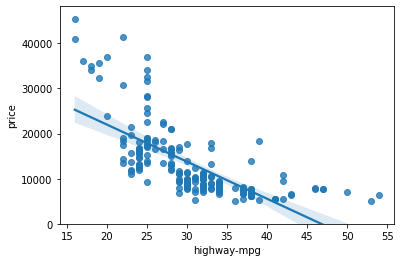

In [ ]:
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

Los datos tienen a bajar mientras la variable dependiente incrementa, se procede a visualizar los residuos

c:\Users\Diego Olarte\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

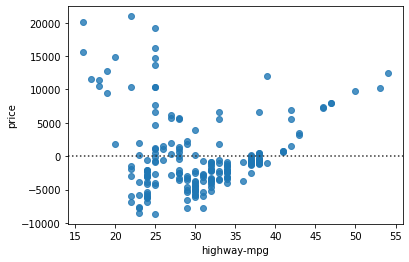

In [ ]:
sns.residplot(df["highway-mpg"], df["price"])

Los residuos tienen una curvatura, sugiriendo una regresion no lineal, un distribution plot es un buen metodo para regresion lineal multiple

### Comparando MLR y SLR

* Un bajo valor en MSE siempre implica un mejor modelo?
  - No necesariamente
* MSE para un modelo de regresion multiple va a ser mas bajo que MSE para un modelo de regresion lineal simple, ya que los errores de los datos van a decrecer cuando se incluyen mas variables en el modelo
* Regresion polinomial tambien va a tener un valor mas bajo en MSE que una regresion regular
* Una relacion inversa a estos items se mantiene para la metrica de R2

### Evidencia Graded Review Questions

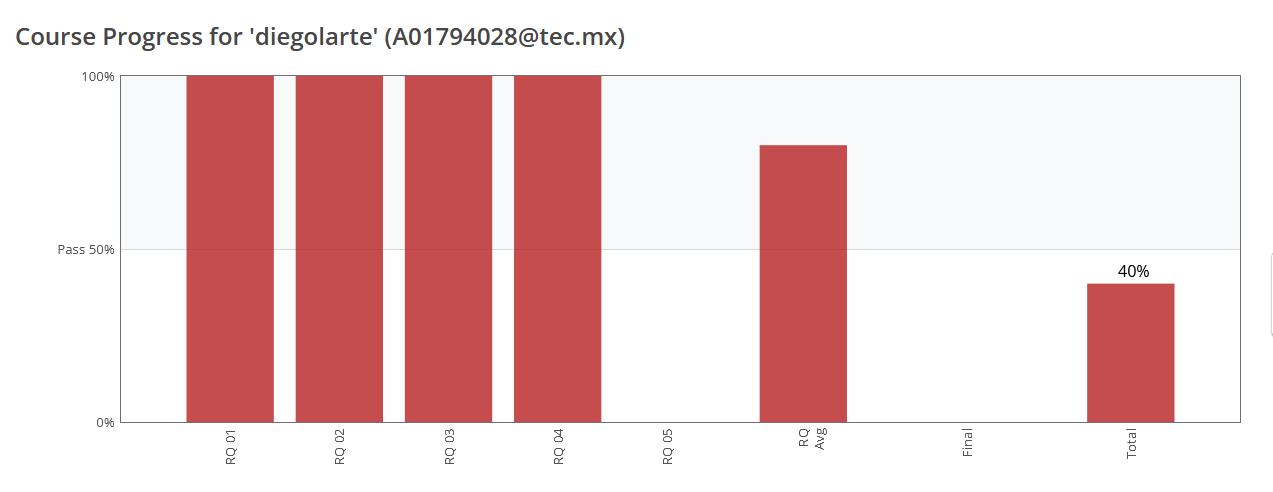